In [1]:
import numpy as np
import torch
from scipy.integrate import odeint
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from torch import nn, autograd
from src.nn import FCN
from src.duffing_generator import DuffingGeneratorClass
from src.physics_loss import physics_loss_class

In [ ]:

# Plot the Duffing oscillator data
plot_duffing_oscillator(d, a, b, gamma, w, x, y)
plt.show()

Input size of the linear layer: 32
Loss at Step 100000 : 236.70468139648438


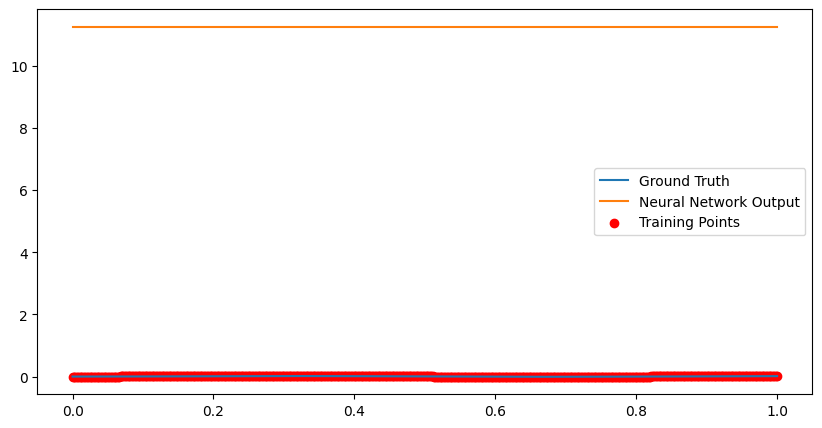

Loss at Step 200000 : nan


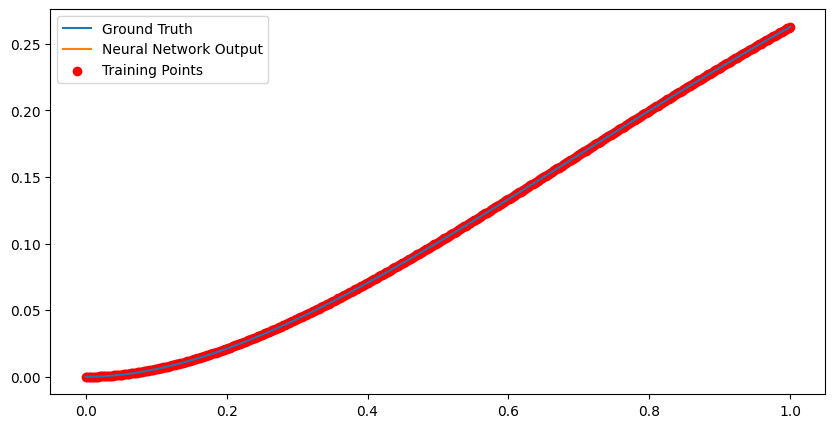

KeyboardInterrupt: 

In [3]:

# Initialization
x = torch.linspace(0, 1, 500).view(-1, 1)
dg = DuffingGeneratorClass()  # Instantiate your class
model = FCN(1, 1, 32, 24)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
torch.manual_seed(123)
physics_loss_instance = physics_loss_class()
# Set up the physics loss training locations
x_physics = torch.linspace(0, 1, 15).view(-1, 1).requires_grad_(True)
X_BOUNDARY = 0.0  # Example value, adjust as needed
F_BOUNDARY = 0.0  # Example value, adjust as needed

# Training loop
for i in range(10000000):
    optimizer.zero_grad()
    if (i + 1) % 100000 == 0:
        batches = dg.duffing_generator()  # Generate new batches
        for batch in batches:
            y, d, a, b, gamma, w, x = batch  # Unpack each batch
            x_data = x[:800]  # Slice first 1000 elements
            y_data = y[:800]
            yh = model(x_data)
            loss1 = torch.mean((yh - y_data)**2)
            # Ensure that d, a, b, gamma, w are iterable
            d, a, b, gamma, w = [d], [a], [b], [gamma], [w]
            loss_physics = physics_loss_instance.physics_loss(model, x_physics, d, a, b, gamma, w)
            x_boundary = torch.tensor([X_BOUNDARY]).view(-1, 1).requires_grad_(True)
            f_boundary = torch.tensor([F_BOUNDARY]).view(-1, 1)
            yh_boundary = model(x_boundary)
            loss_boundary = torch.mean((yh_boundary - f_boundary)**2)
            total_loss = loss1 + loss_physics + loss_boundary

                   # Backpropagation
            total_loss.backward()
            optimizer.step()

        # Plotting every 1000 steps
        if (i + 1) % 1000 == 0:
            print("Loss at Step", i + 1, ":", total_loss.item())
            yh = model(x).detach().numpy()
            plt.figure(figsize=(10, 5))
            plt.plot(x_data.numpy(), y_data.numpy(), label='Ground Truth')  # Check if y_data is the correct ground truth
            plt.plot(x.numpy(), yh, label='Neural Network Output')
            plt.scatter(x_data.numpy(), y_data.numpy(), color='red', label='Training Points')
            plt.legend()
            plt.show()

# Self-feeding predictions
x_self_feed = x_data[0].reshape(1, -1)
predictions = []
for _ in range(100):  # Define n_steps = 100 directly in the loop
    with torch.no_grad():
        y_pred = model(x_self_feed)
    predictions.append(y_pred.item())
    x_self_feed = y_pred.reshape(1, -1)  # Ensure correct shape for the next input

# Convert predictions to a tensor for analysis
predictions_tensor = torch.tensor(predictions).view(-1, 1)


# Assuming 'y' contains the ground-truth data
# Let's perform stability analysis
ground_truth = y[:n_steps]  # Ground-truth data for comparison
difference = torch.abs(predictions_tensor - ground_truth)  # Calculate the difference

# Finding the step at which predictions become unstable
threshold = 0.1  # A predefined threshold
unstable_step = torch.where(difference > threshold)[0].min().item()

# Plotting the prediction at the unstable step, variance from threshold, and ground truth


plt.figure(figsize=(10, 6))
plt.plot(predictions_tensor[:unstable_step], label='Predictions', color='blue')
plt.plot(ground_truth[:unstable_step], label='Ground Truth', color='green')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title(f'Prediction and Ground Truth up to Unstable Step {unstable_step}')
plt.legend()
plt.grid(True)
plt.show()

     
if (i + 1) % 1000 == 0:
    print("Loss at Step", i + 1, ":", total_loss.item())
    yh = model(x).detach().numpy()  # Ensure x is in the correct format for the model
    plt.figure(figsize=(10, 5))
    plt.plot(x.numpy(), yh, label='Neural Network Output')
    plt.scatter(x_data.numpy(), y_data.numpy(), color='red', label='Training Points')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Neural Network Prediction')
    plt.legend()
    plt.show()



In [ ]:
print(torch.cuda.is_available())


In [ ]:
# Create an instance of the class
dg = DuffingGeneratorClass()

# Call the duffing_generator method
batches = dg.duffing_generator(x)